# **E-commerce Customer Segmentation**

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## **Loading Dataset**

In [24]:
df = pd.read_excel("/content/drive/MyDrive/GUVI/Datasets/cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## **Understanding Data**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [16]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## **Data Cleaning**

### **Checking Duplicate Values**

In [19]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


### **CHecking Null Values**

In [20]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

### **Fill the NaN Values with mode**

In [21]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

### **Recheck the Null Values**

In [22]:
df.isna().sum().sum()

0

## **Data Visualization**

In [23]:
df.Gender.value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

### **Count of Male and Female Customers**

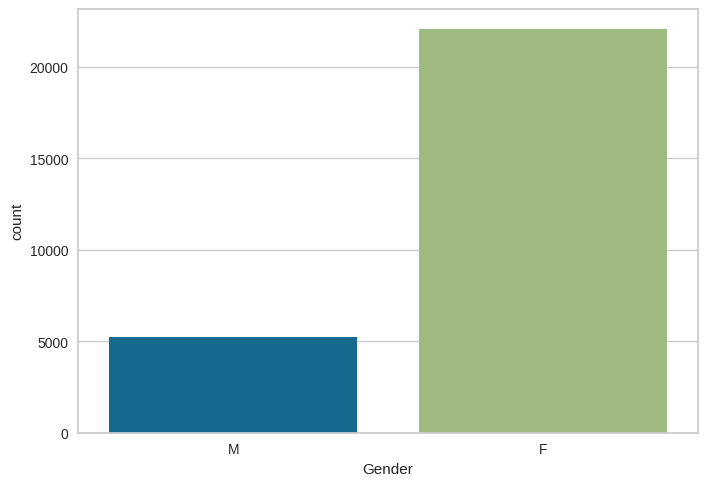

In [30]:
sns.countplot(data=df,x='Gender')
plt.show()

### **Overall orders and count by each gender**

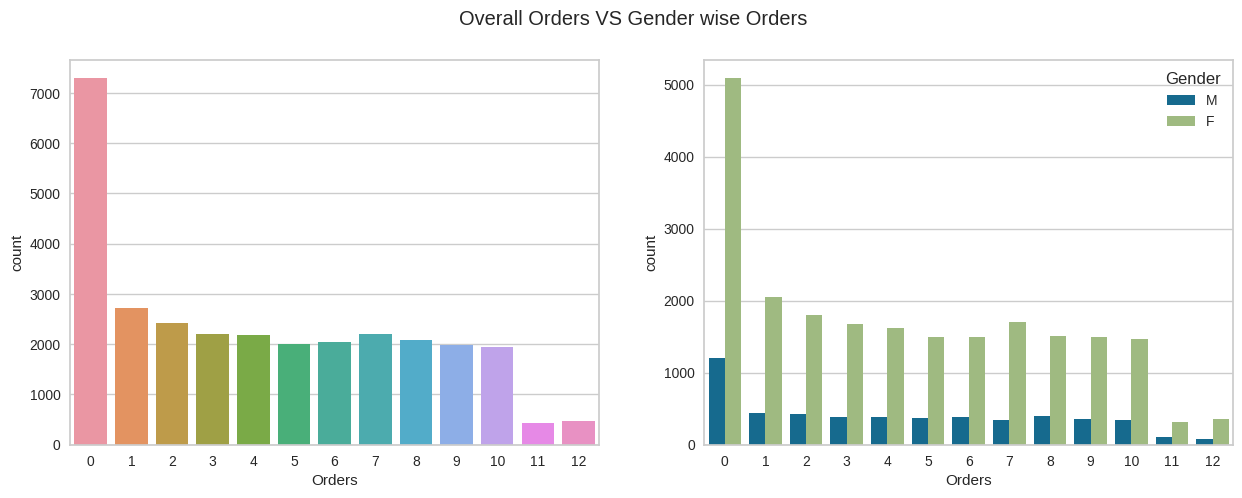

In [33]:
#overall orders count
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Orders')

#orders count by each gender
plt.subplot(1,2,2)
sns.countplot(data=df, x='Orders', hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

### **Boxplot for each Brand Orders**

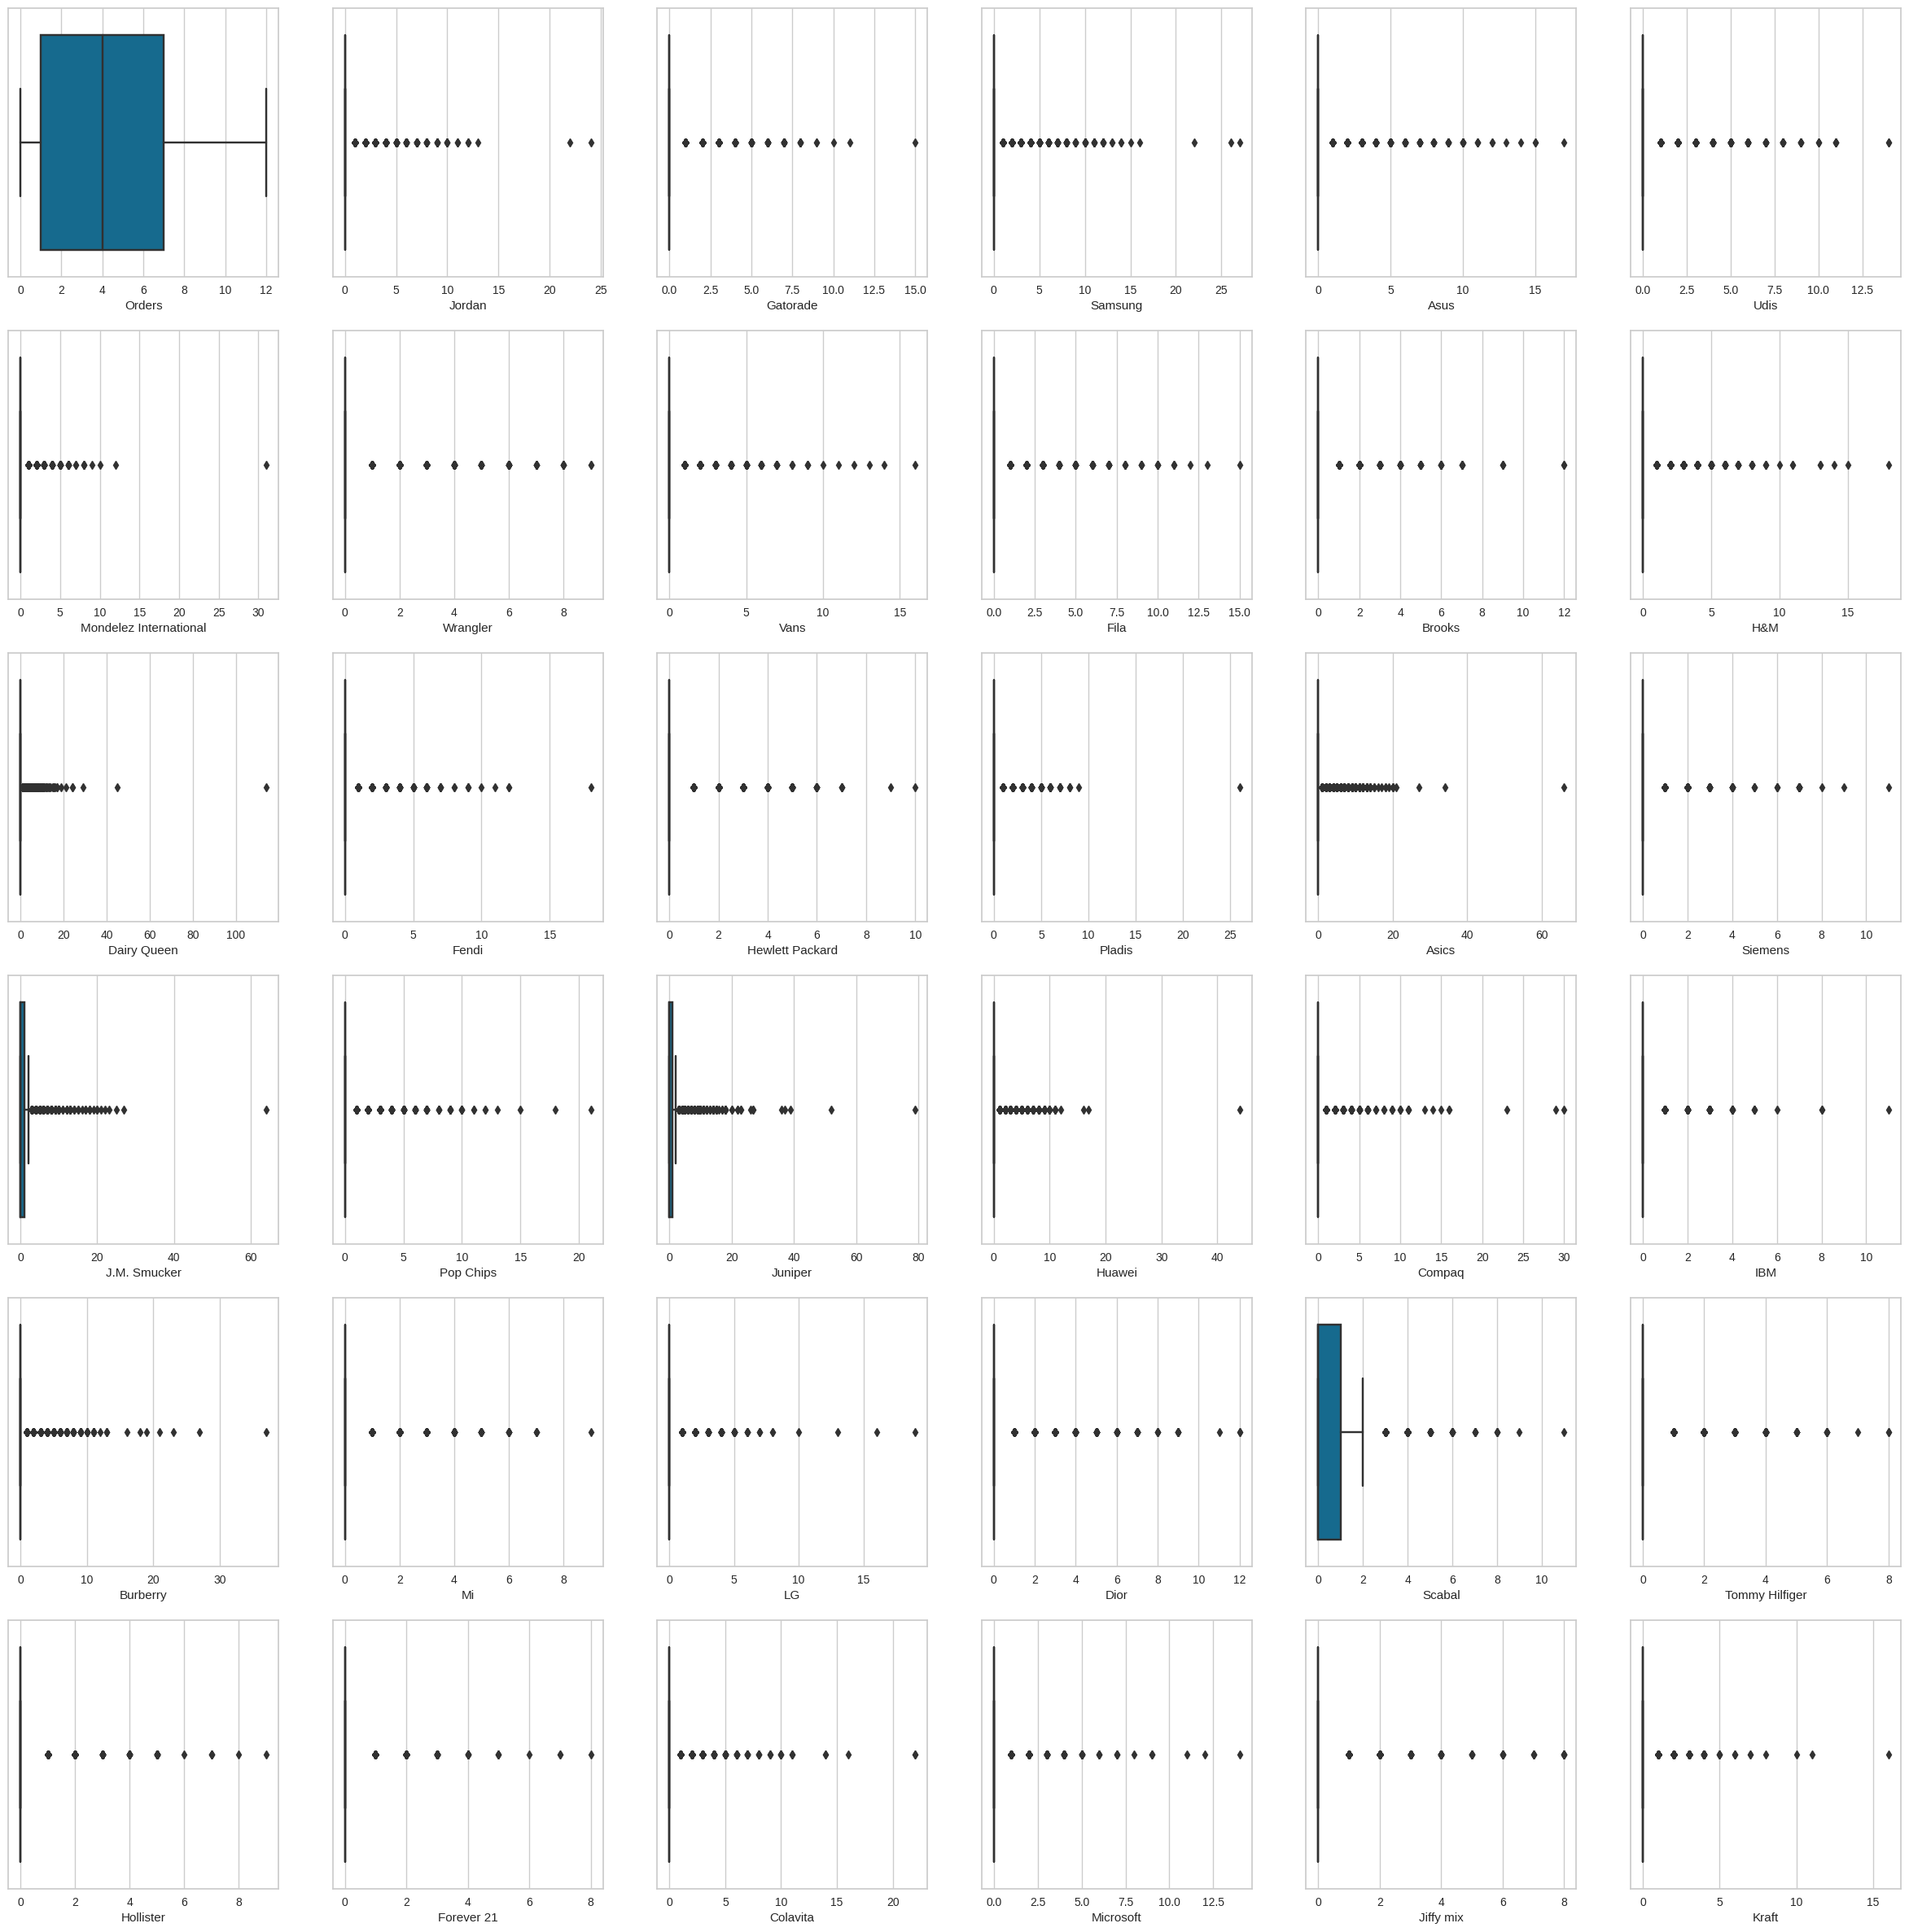

In [35]:
cols = list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df, x=df[col])
dist_list(cols)

### **Heatmap of above 2 column**

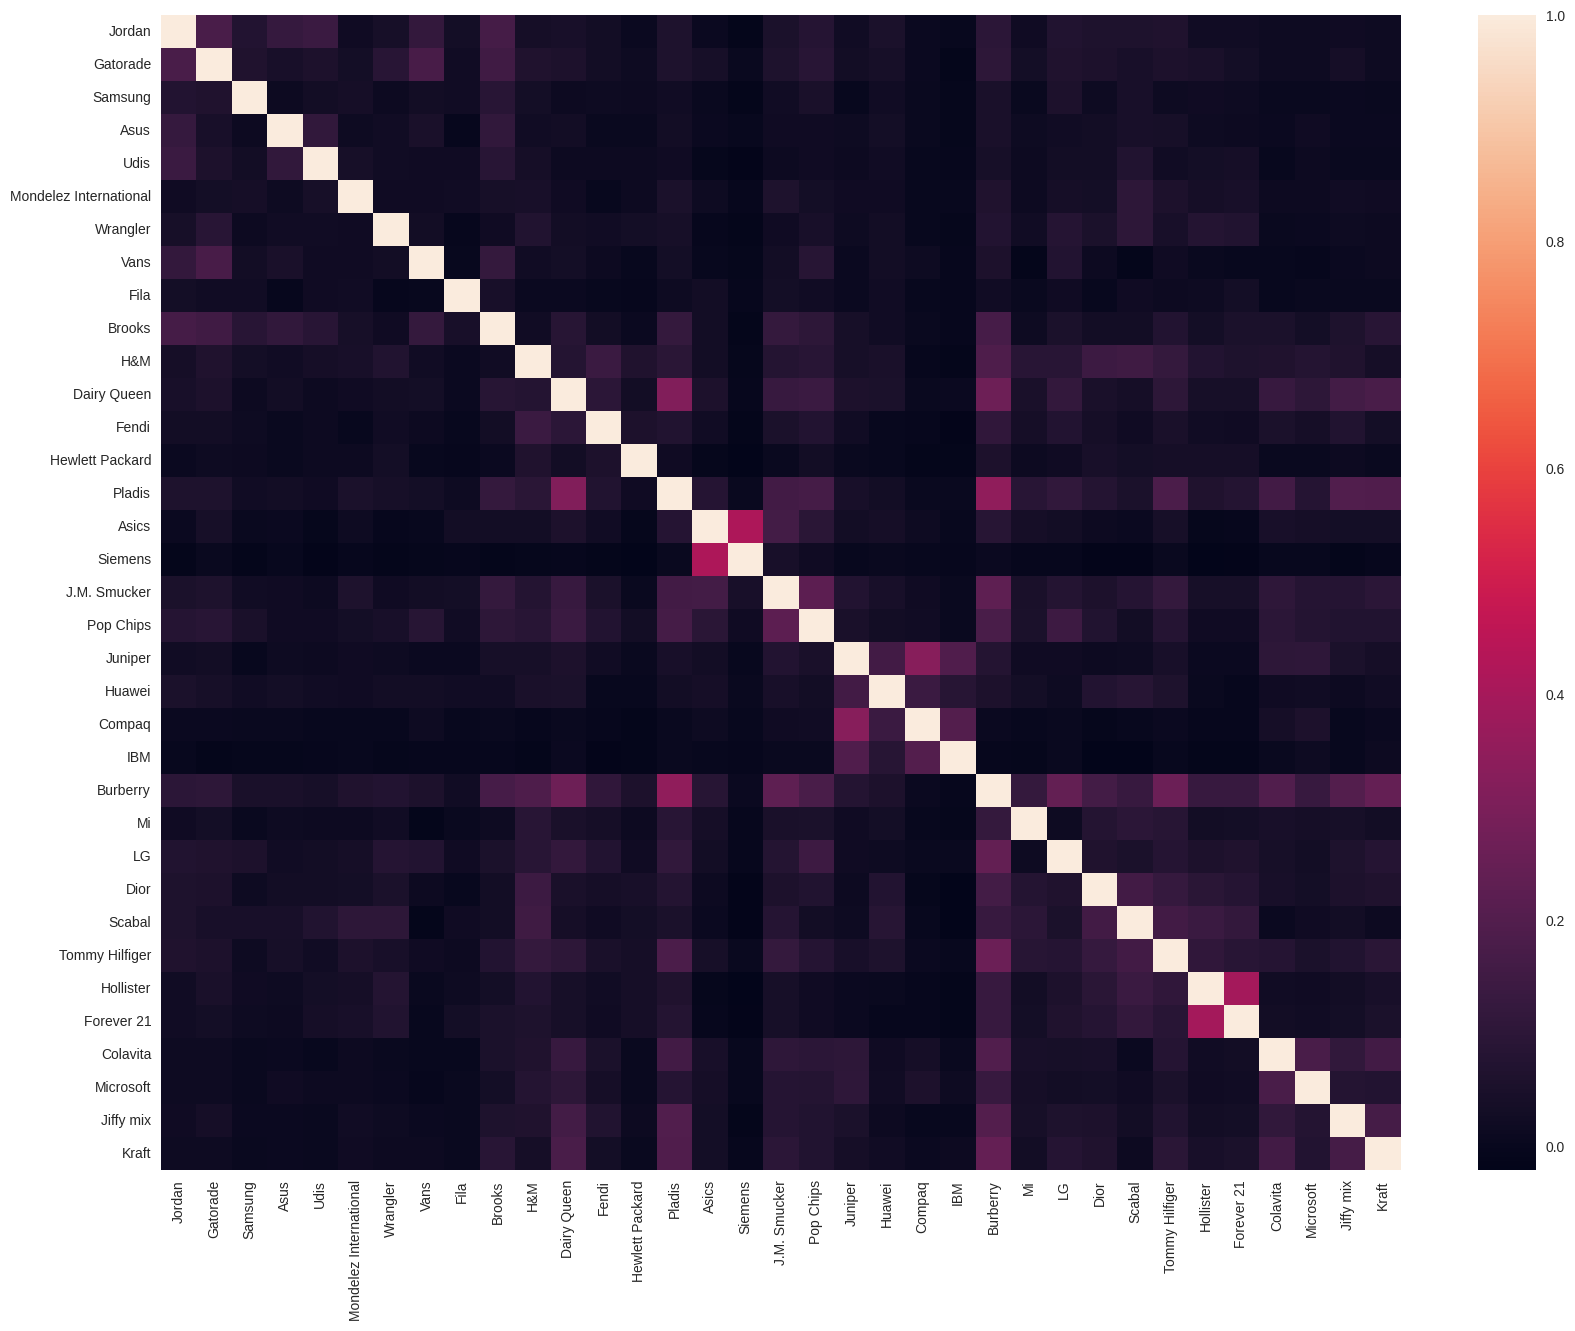

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3: ].corr())
plt.show()

### **Hist Plot**

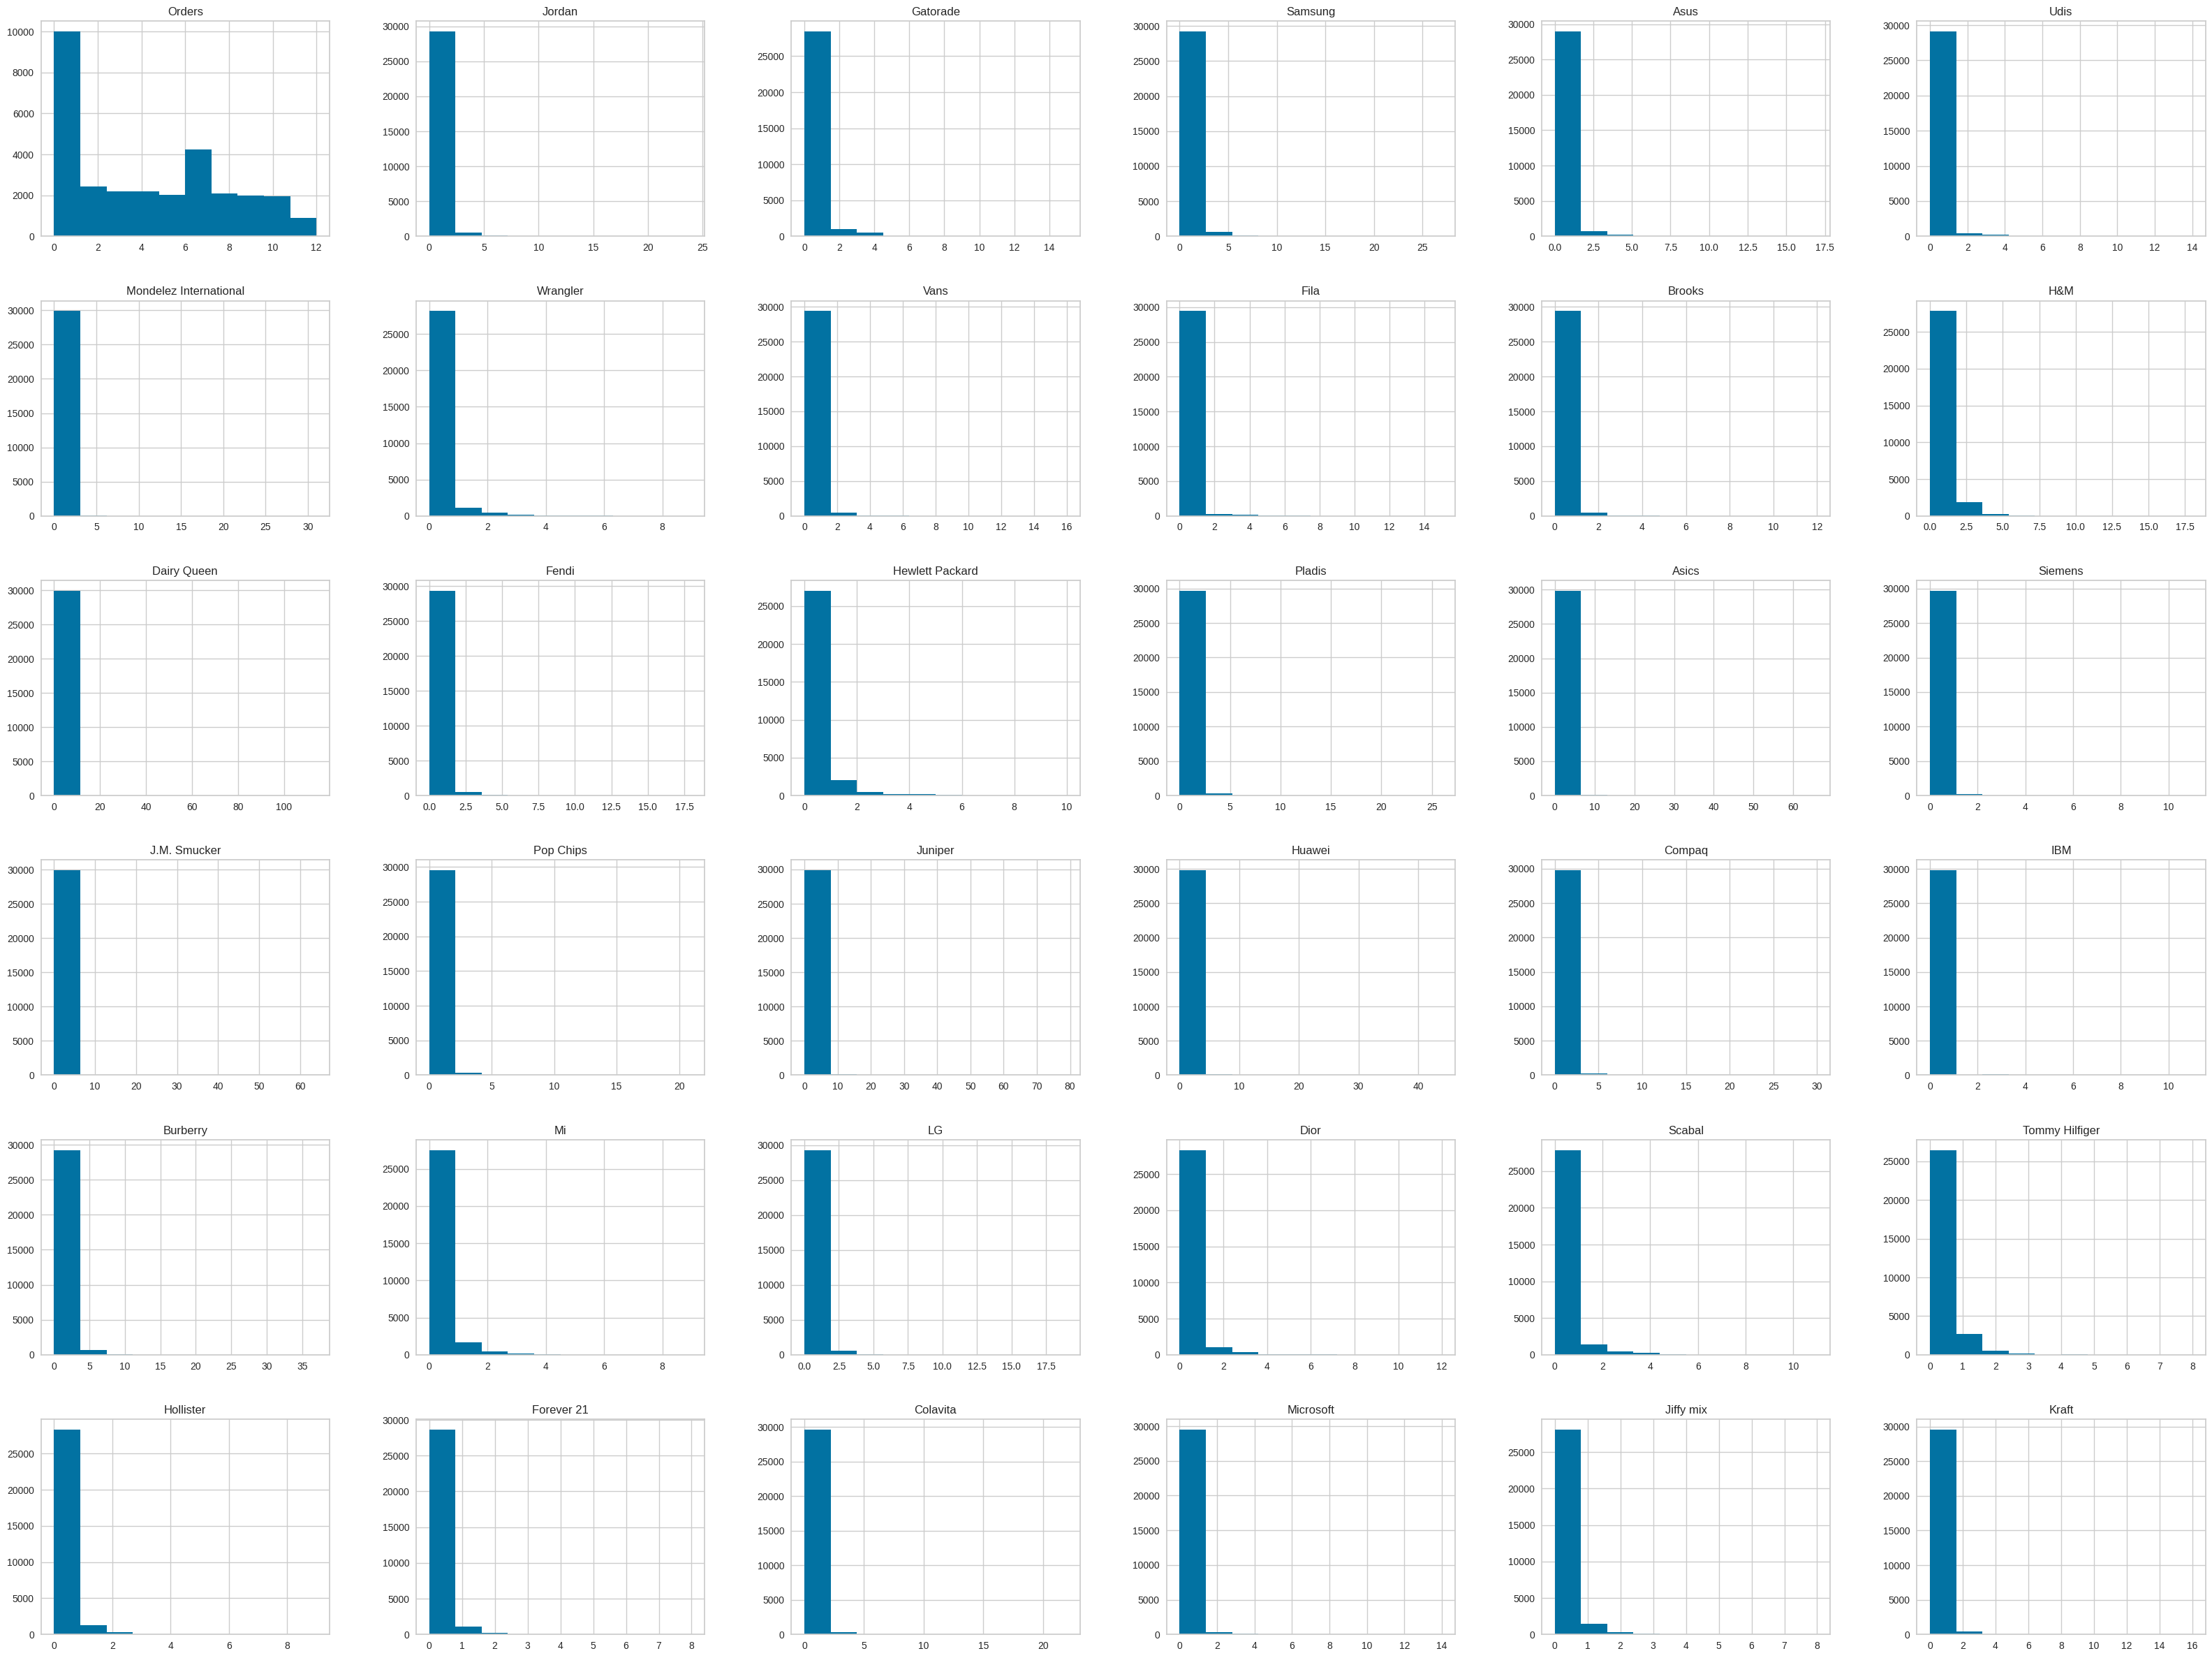

In [40]:
df.iloc[:,2:].hist(figsize=(40,30))
plt.show()

### **Create a new dataset and Total Search Column**

In [42]:
new_df = df.copy()
new_df['Total_Search'] = new_df.iloc[:,3:].sum(axis=1)

In [43]:
new_df.sort_values('Total_Search',ascending = False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,NaN,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Bar plot of Total search and customers id**

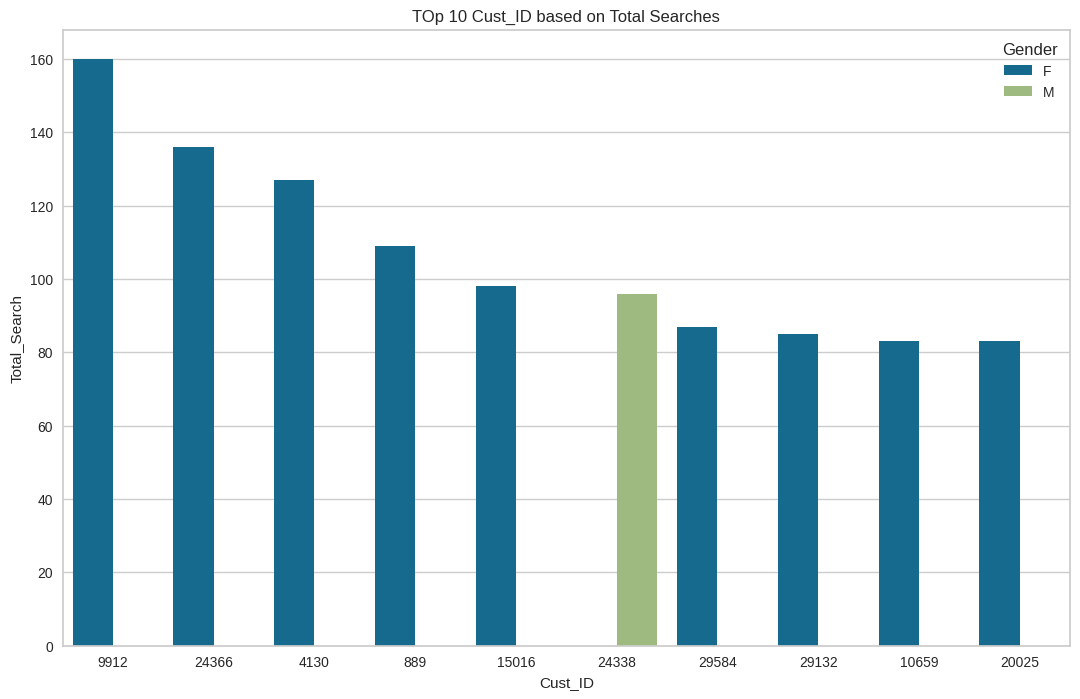

In [46]:
plt.figure(figsize = (13,8))
plt_data = new_df.sort_values('Total_Search', ascending = False)[['Cust_ID', 'Gender', 'Total_Search']].head(10)
sns.barplot(data = plt_data,
            x = 'Cust_ID',
            y = 'Total_Search',
            hue = 'Gender',
            order = plt_data.sort_values('Total_Search' , ascending = False).Cust_ID)
plt.title("TOp 10 Cust_ID based on Total Searches")
plt.show()

## **Scaling**

In [47]:
x = df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [48]:
scale = MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

## **Elbow Method to get optimal K value**

In [ ]:
inertia = []
for i in range(1, 16):
  k_means = KMeans(n_clusters=i)
  k_means = k_means.fit(features)
  inertia.append(k_means.inertia_)

### **Silhouette Score for each k value**

In [ ]:
silhouette_avg = []
for i in range(2, 16):
  #initialize Kmeans
  kmeans = KMeans(n_clusters  =i)
  cluster_labels = kmeans.fit_predict(features)
  #silhouette Score
  silhouette_avg.append(silhouette_score(features, cluster_labels))

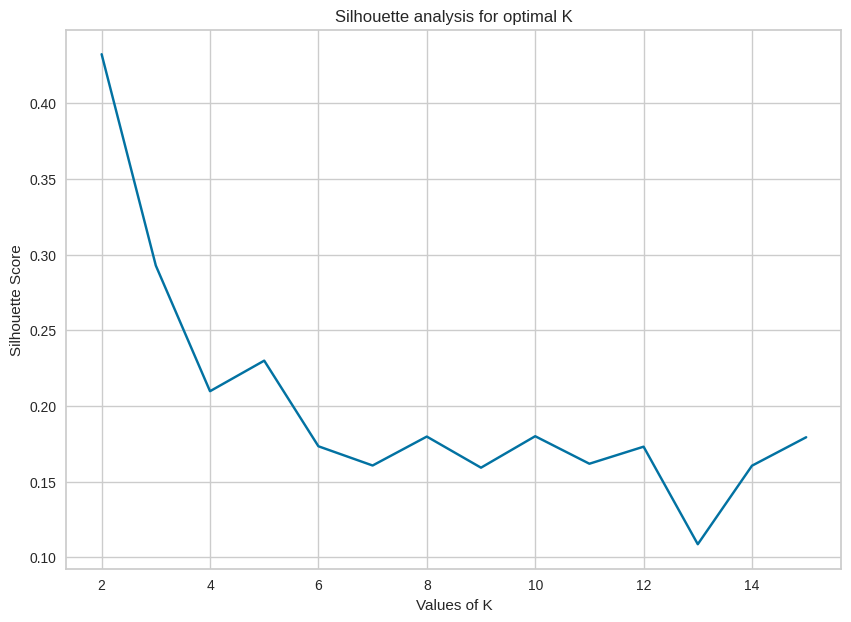

In [54]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for optimal K')
plt.show()

## **K-means Model**

Taking K value of 3 as per Elbow Method

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(features)

In [56]:
y_km = model.predict(features)
centers = model.cluster_centers_

In [57]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv('Cluster_data', index=False)

In [59]:
df['Cluster'].value_counts()

0    12432
1     9128
2     8440
Name: Cluster, dtype: int64

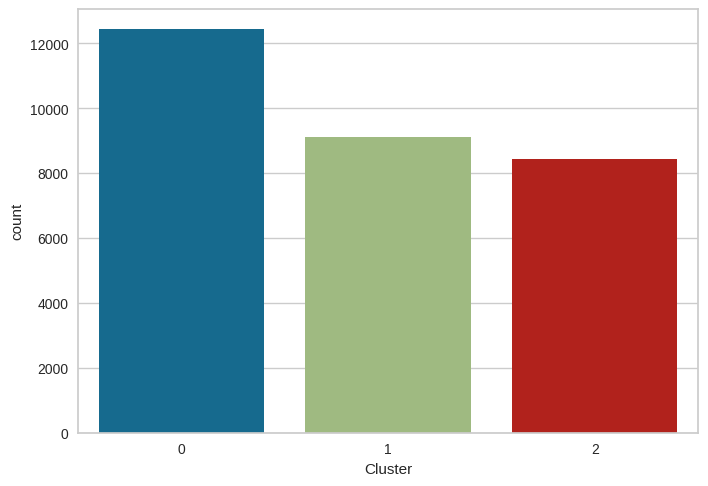

In [60]:
sns.countplot(data = df, x = 'Cluster')
plt.show()

## **Analyzing Clusters**

In [61]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [68]:
c_df['Total_Search'] = c_df.iloc[:,3:38].sum(axis = 1)

## **Analyzing Cluster 0**

In [70]:
cl_0 = c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster == 0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Seach,Total_Search
0,0,F,134763084,5639,2288,1771,1913,1707,1513,1344,...,3801,1583,744,567,1720,1055,787,677,63857,63857
1,0,M,28245384,1291,601,777,435,12,75,162,...,175,172,83,55,386,186,160,142,10787,10787


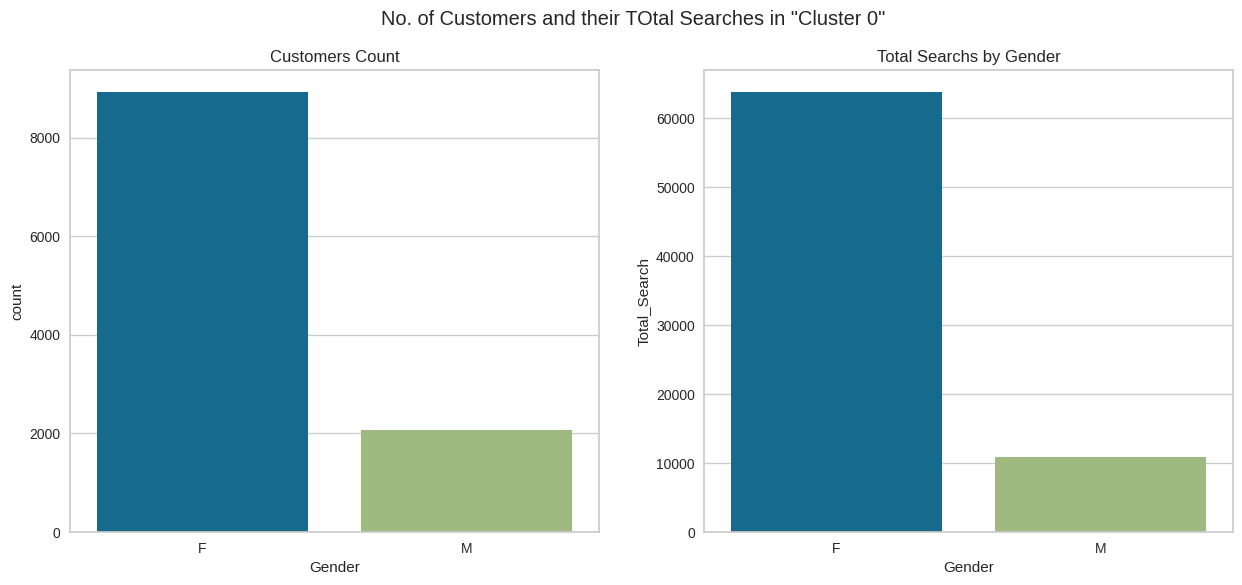

In [71]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 0'), x = 'Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data = cl_0, x = 'Gender', y = 'Total_Search')
plt.title('Total Searchs by Gender')
plt.suptitle('No. of Customers and their TOtal Searches in "Cluster 0"')
plt.show()

## **Analyzing Cluster 1**

In [72]:
cl_1 = c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster == 1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Seach,Total_Search
2,1,F,106103730,59684,1831,1573,1627,1499,1216,1042,...,3192,1225,541,419,1324,853,667,462,51128,51128
3,1,M,22723520,14279,526,817,341,14,51,151,...,97,155,90,42,326,176,123,98,9322,9322


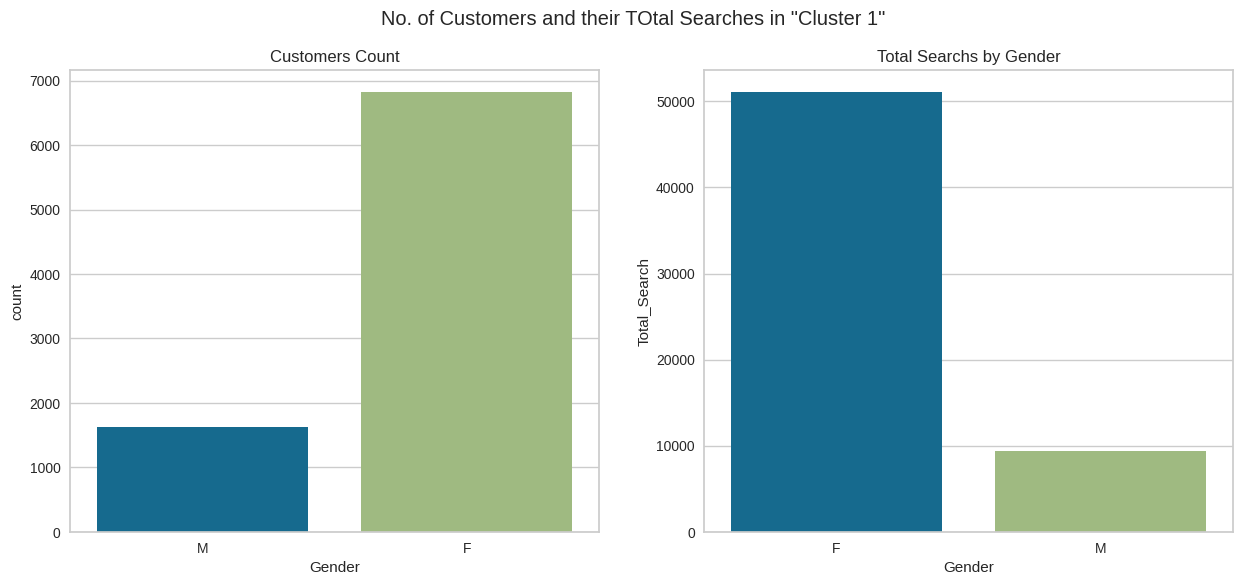

In [73]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 1'), x = 'Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data = cl_1, x = 'Gender', y = 'Total_Search')
plt.title('Total Searchs by Gender')
plt.suptitle('No. of Customers and their TOtal Searches in "Cluster 1"')
plt.show()

## **Analyzing Cluster 2**

In [74]:
cl_2 = c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster == 2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Seach,Total_Search
4,2,F,96648546,27990,1785,1482,1568,1341,1113,1031,...,2908,1116,608,439,1235,828,624,455,47783,47783
5,2,M,21374453,6894,521,748,321,22,55,147,...,104,117,56,41,294,193,110,110,8543,8543


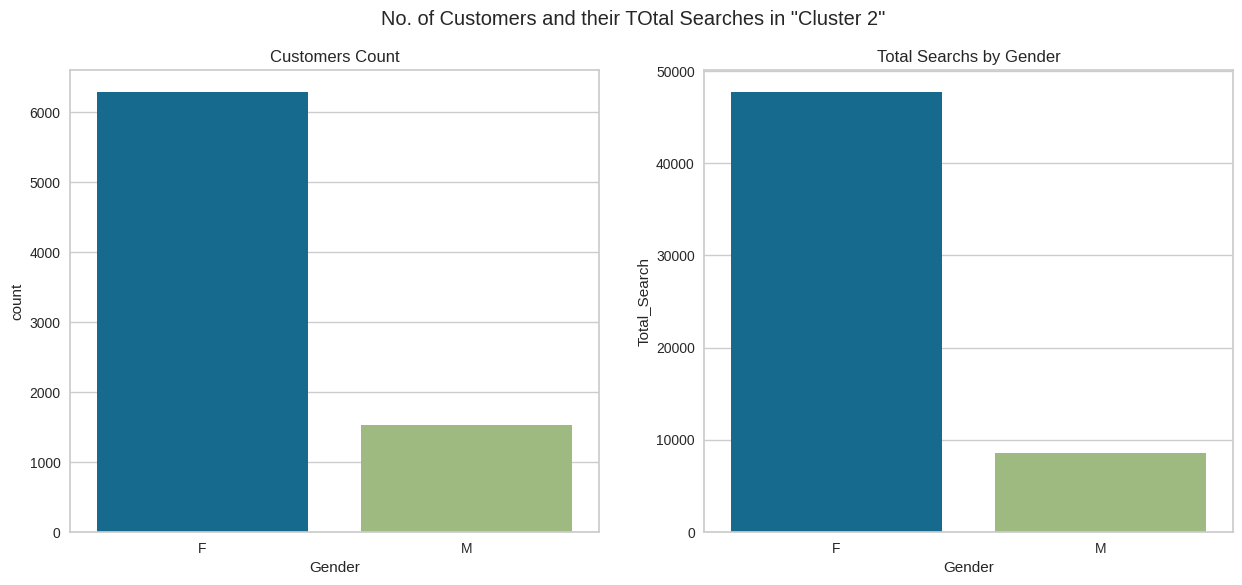

In [75]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 2'), x = 'Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data = cl_2, x = 'Gender', y = 'Total_Search')
plt.title('Total Searchs by Gender')
plt.suptitle('No. of Customers and their TOtal Searches in "Cluster 2"')
plt.show()

In [76]:
final_df = c_df.groupby(['Cluster'], as_index = False).sum()
final_df

<ipython-input-76-075550a63c08>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = c_df.groupby(['Cluster'], as_index = False).sum()


,Cluster,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Seach,Total_Search
0,0,182944741,7560,3071,2724,2521,1825,1707,1642,1283,...,4369,1979,930,709,2346,1339,1030,918,81477,81477
1,1,139225430,79885,2508,2495,2121,1579,1359,1296,978,...,3537,1477,695,507,1791,1094,836,608,64573,64573
2,2,127844829,37649,2444,2351,2046,1436,1240,1255,947,...,3196,1313,705,504,1629,1058,775,601,60093,60093


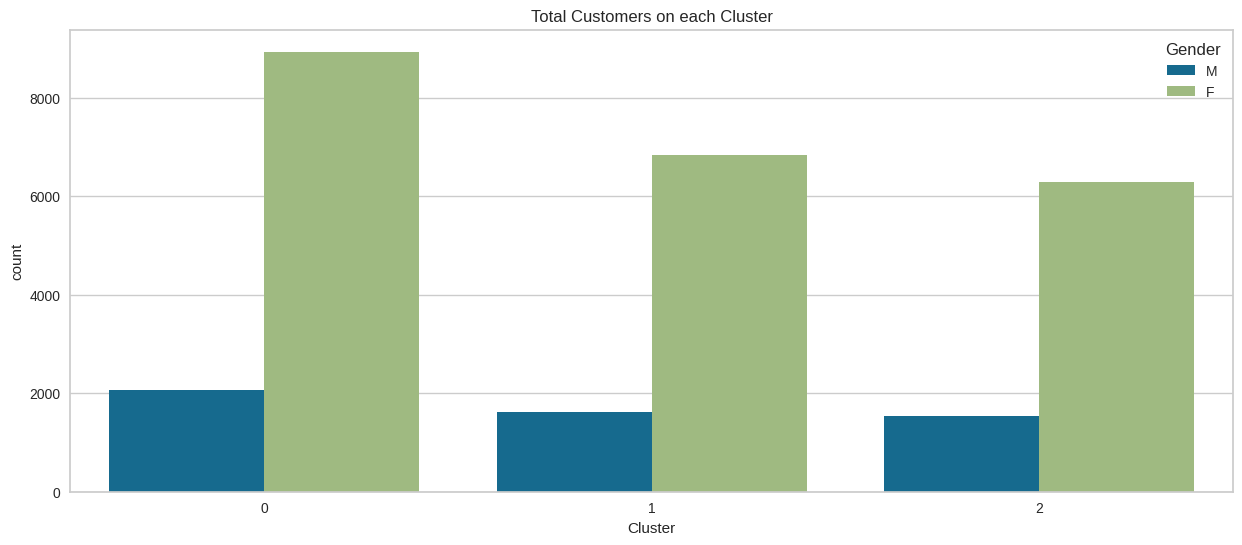

In [77]:
plt.figure(figsize = (15,6))
sns.countplot(data = c_df, x='Cluster', hue = 'Gender')
plt.title('Total Customers on each Cluster')
plt.show()

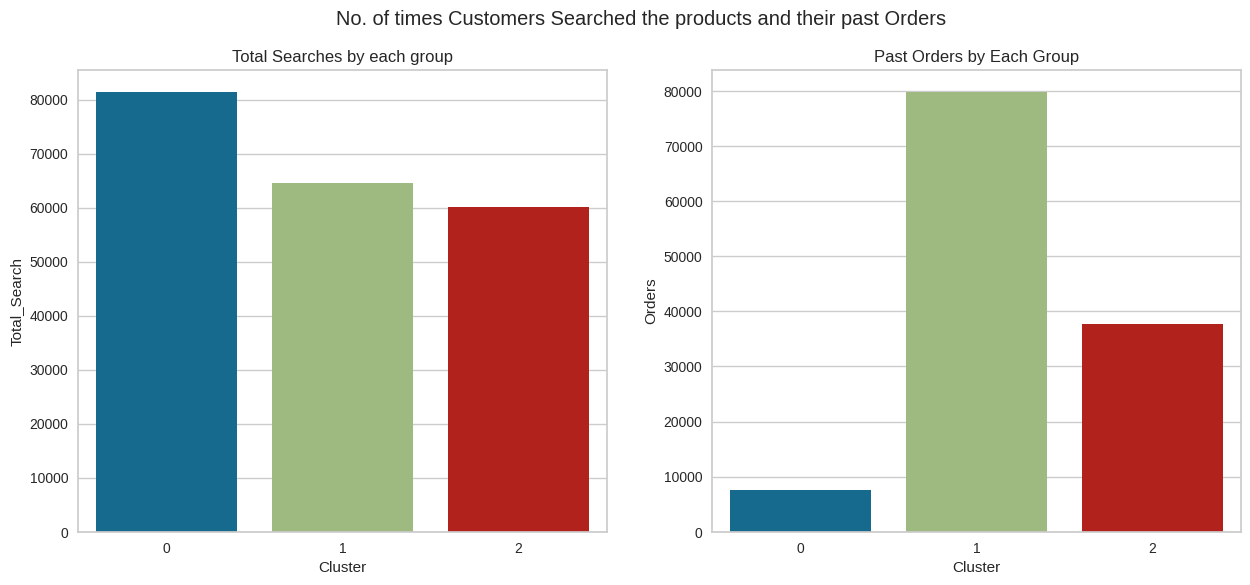

In [82]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(data = final_df, x = 'Cluster' , y = 'Total_Search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past Orders by Each Group')
plt.suptitle('No. of times Customers Searched the products and their past Orders')
plt.show()

## **Conclusion**

### From the above Cluster analysis these are the following insights about each clusters :

   - Among 30000 customers

       - Cluster 0 has 12432 customers (Very Low past orders but done most searches)
       - Cluster 1 has 9128 customers (Very High past orders and average searches)
       - Cluster 2 has 8440 customers (Average past orders and average searches)

\

   - Cluster 0 has **many** customers but their past orders is only **7560**.
   - Cluster 1 is at the **top** based on past orders with **79885** orders which is more than **10 times** of Cluster 0.
   - Cluster 2 has **least** number of customers but has **37649** past orders which is almost **500%** greater than cluster 0.
   - Cluster 0 has done **most** number of searches with **81477** searches.
   - Cluster 2 has **least** number of searches with **60093** searches followed by cluster 1 with **64573** searches.